# Homework 4 - Movie Recommendation System

<p align="center">
<img src="https://movielens.org/images/site/main-screen.png" width = 600>
</p>

Understanding user preferences is essential for recommendation systems in the entertainment industry, especially in movies. The MovieLens dataset is a rich source of user behavior data, including movie ratings, that can help explore trends and preferences. Hashing and clustering techniques can be implemented to analyze and segment users to provide personalized recommendations.

You and your team were hired to help hired to work on a recommendation system. Your tasks are to apply hashing techniques to improve data retrieval speed and to use clustering to group users by similar movie preferences. 

---

## VERY IMPORTANT

1. **!!! Read the entire homework before coding anything!!!**
2. *My solution is not better than yours, and yours is not better than mine*. In any data analysis task, there **is no** unique way to answer. For this reason, it is crucial (**necessary and mandatory**) that you describe every decision you make and all your steps.
3. Once solving an exercise, comments about the obtained results are **mandatory**. We are not always explicit about where to focus your comments, but we will always want brief sentences about your discoveries.
4. We encourage using chatGPT (Claude AI, Gemini, Perplexity, or any other Large Language Models (LLM) chatbot tool) to help you solve your homework, but we expect you to learn how to use them responsibly. **Using such tools when not explicitly allowed will be considered plagiarism and strictly prohibited**.

Now that it is all well settled, let's get on with it!

---

## 1. Recommendation System with LSH

In this section, you will implement a recommendation system by identifying users with similar preferences and suggesting movies based on their behavior. 
Specifically, you will implement your version of the [**LSH algorithm**](https://www.learndatasci.com/tutorials/building-recommendation-engine-locality-sensitive-hashing-lsh-python/).

### 1.1 Data Preparation

Download the MovieLens dataset from [here](https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset?select=rating.csv). After downloading, explore the dataset to understand the structure and identify any preprocessing steps needed.

### 1.2 Minhash Signatures

Using the `userId` and `movieId` columns, implement your own MinHash function. This function will hash each user's watched movie list, creating a representation that allows for quick comparisons of user similarities.

- **Important:** Implement your MinHash function from scratch—**do not use any pre-built hash functions.**
- Use your MinHash function to generate signature vectors for each user based on their rated movies.
- Experiment with different hash functions and threshold values to find the most effective configurations. Report these results.
- Read the class materials and, if necessary, conduct an internet search. The description of hash functions in the [book](http://infolab.stanford.edu/~ullman/mmds/ch3n.pdf) may be helpful as a reference.

### 1.3 Locality-Sensitive Hashing (LSH)

Now that you have generated MinHash user signatures, apply Locality-Sensitive Hashing (LSH) to cluster similar users.

1. **Bucket Creation:** For each user, divide the MinHash signature into bands and hash each band to form buckets. Users with similar bands should fall into the same buckets.
   - **Debugging Tip:** After creating buckets, check a few bucket contents to verify that multiple users are being grouped in the same buckets.
   
2. **Query:** For a given user, identify the **two most similar users** based on their bucket placement. If a user doesn’t have any similar users in their bucket, adjust the parameters until similar users are found.

3. **Movie Recommendation Logic:**
   - If both similar users have rated a movie, recommend this movie based on the **average rating**.
   - If there are no commonly rated movies, recommend the top-rated movies of the most similar user.

4. **Final Recommendation:** Provide **at most five movies** to the user. 

Example recommendation logic for a user:

| User | Movie Title         | Rating |
|------|----------------------|--------|
| A    | Inception           | 4.5    |
| A    | Titanic             | 4.2    |
| A    | Avatar              | 2.8    |
| B    | Inception           | 4.6    |
| B    | The Matrix          | 3.9    |
| B    | Toy Story           | 4.7    |
| C    | Titanic             | 3.8    |
| C    | Avatar              | 4.3    |
| C    | Shrek               | 4.1    |

If User A and User B are identified as the two most similar users to User X, the recommended movies would be:
1. **Common Movies:** "Inception" (average rating: 4.55).
2. **Top-rated from Most Similar User:** "Toy Story" (4.7) from User B and "Titanic" (4.2) from User A.
3. If fewer than 5 movies are found, complete the list using other high-rated movies by the most similar users.

## 2. Grouping Movies Together! 
In this section, you will explore clustering algorithms to group the movies you have based on specific features you choose to consider for them.

### 2.1 Feature Engineering 
As you know, the dataset provided isn’t particularly clean or well-structured to represent the features of the movies. Therefore, your first step is to create a more suitable set of attributes (variables, features, covariates) to represent the movies based on the available information. Here are some variables or features you might consider for clustering:

1. ```movieid``` id of each movie 
2. ```genres``` list of genres attached to the movie (given that a movie may have several genres, it’s essential to devise a method to accurately represent the genres for each movie)
3. ```ratings_avg``` the average ratings provided by users for the movie
4. ```relevant_genome_tag``` the most relevant tag to the movie given in the genome set
5. ```common_user_tag``` the most common tag given to the movie by the users

In addition to the above features, include **at least three additional** features for clustering.

__Note__: If you have accurately identified and applied the methods for representing the features, you should have __more than eight features__! How could this happen? Take a moment to think about it.

### 2.2 Choose your features (variables)!
With multiple features available for the movies, you need to consider the following two questions: 1. Should you normalize the data or leave it as is? 2. Should you include all these features, or can you reduce the dimensionality of the data?

1. What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?
2. If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html) package for tools and functions that facilitate data normalization.
3. Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?
4. If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data.

### 2.3 Clustering 
Now that you have prepared the data, you can create the clusters.

1. How can you determine the optimal number of clusters for your data? Please use at least two methods and provide their results.
2. Implement the K-means clustering algorithm (not K-means++) through MapReduce. We request that you develop the algorithm from scratch based on what you've learned in class and run the algorithm on your data.
3. Implement the K-means++ algorithm from scratch and apply it to your data. Do you notice any differences between the results obtained using random initialization and those achieved with K-means++? Please explain your observations and discuss why these differences might occur.
4. Ask an LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.) to recommend another clustering algorithm. Use that LLM to describe the workings of the algorithm, as well as its advantages and disadvantages compared to K-means and K-means++. Additionally, ask to implement the algorithm for you or utilize an existing version from a package. Apply that algorithm to your data and explain any differences you observe in the results compared to those obtained previously.

 ### 2.4 Best Algorithm
Clustering helps identify natural groupings within data, but no single algorithm works best for every dataset. In this section, you’ll learn how to choose the most suitable clustering method based on your data’s unique characteristics. By analyzing patterns and comparing results, you’ll uncover which algorithm provides the most meaningful insights and clusters.


1. Set the number of clusters to the optimal number $k_{opt}$ based on any of the methods previously.
2. Select three distinct metrics to assess the quality of the clusters. Describe each metric in detail, including the specific aspects they evaluate to determine the effectiveness of the clustering model.
3. Apply the three clustering algorithms used in the prior section to partition the data into $k_{opt}$ clusters. Then, evaluate each model's clustering quality using the selected metrics. Summarize your findings by comparing the results of each algorithm based on the metric evaluations.

## 3. Bonus Question
K-means is an iterative algorithm, meaning that with each iteration, it refines the clusters by adjusting them based on the distance of each data point relative to the center of each cluster. This process continues until it reaches a point of convergence or hits a set limit on the number of iterations. You might want to track the progress of forming your clusters.

1. Select two variables* from your instances to display them on a 2D plot. Then, illustrate the progression of the clusters as they change at each iteration. We expect a plot for each iteration, displaying the instances and the clusters they belong to. Select the two features that most effectively separate visual instances belonging to different clusters. Explain the method you used to determine these features.

__*Note:__ Depending on the variables you want to use for clustering, whether they are the original movie features or the components derived from PCA, you may select two features/components that best help to visually display the clusters.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
from libs.k_means_visualizer import KMeansVisualizer
from libs.k_means_plus_plus import KMeansPlusPlus
from libs.k_means import KmeansSpark

## <strong> Import the datasets </strong>

In [3]:
# Load datasets
df_movie = pd.read_csv("dataset/movie.csv")
df_link = pd.read_csv("dataset/link.csv")
df_rating = pd.read_csv("dataset/rating.csv")
df_tag = pd.read_csv("dataset/tag.csv")
df_genome_tags = pd.read_csv("dataset/genome_tags.csv")
df_genome_scores = pd.read_csv("dataset/genome_scores.csv")

In [4]:
# Show first 5 rows and schema-like info
df_movie.info()
df_movie.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### 2.1 Feature Engineering 
As you know, the dataset provided isn’t particularly clean or well-structured to represent the features of the movies. Therefore, your first step is to create a more suitable set of attributes (variables, features, covariates) to represent the movies based on the available information. Here are some variables or features you might consider for clustering:

1. ```movieid``` id of each movie 
2. ```genres``` list of genres attached to the movie (given that a movie may have several genres, it’s essential to devise a method to accurately represent the genres for each movie)
3. ```ratings_avg``` the average ratings provided by users for the movie
4. ```relevant_genome_tag``` the most relevant tag to the movie given in the genome set
5. ```common_user_tag``` the most common tag given to the movie by the users

In addition to the above features, include **at least three additional** features for clustering.

__Note__: If you have accurately identified and applied the methods for representing the features, you should have __more than eight features__! How could this happen? Take a moment to think about it.

In [5]:
# Create a new dataset (df) for processing
df = df_movie.copy()

In [6]:
# 1. Extract Title and Release Year
df["year"] = df["title"].str.extract(r"\((\d{4})\)")  # Extract year in parentheses
df["Title"] = df["title"].str.replace(r"\s*\(\d{4}\)\s*", "", regex=True)  # Remove year from title
df.drop(columns=["title"], inplace=True)
df.head(5)

,movieId,genres,year,Title
0,1,Adventure|Animation|Children|Comedy|Fantasy,1995,Toy Story
1,2,Adventure|Children|Fantasy,1995,Jumanji
2,3,Comedy|Romance,1995,Grumpier Old Men
3,4,Comedy|Drama|Romance,1995,Waiting to Exhale
4,5,Comedy,1995,Father of the Bride Part II


In [7]:
# 2.Split Genres into a List
df["genres_list"] = df["genres"].str.split("|")

df.drop(columns=["genres"], inplace=True)

df.head(5)

,movieId,year,Title,genres_list
0,1,1995,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,1995,Jumanji,"[Adventure, Children, Fantasy]"
2,3,1995,Grumpier Old Men,"[Comedy, Romance]"
3,4,1995,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,5,1995,Father of the Bride Part II,[Comedy]


In [8]:
# 3. Create the Rating Count column
df_rating_count = (
    df_rating.groupby("movieId")["rating"]
    .count()
    .reset_index()
    .rename(columns={"rating": "rating_count"})
)
df = df.merge(df_rating_count, on="movieId", how="left")

df.head(5)

,movieId,year,Title,genres_list,rating_count
0,1,1995,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",49695.0
1,2,1995,Jumanji,"[Adventure, Children, Fantasy]",22243.0
2,3,1995,Grumpier Old Men,"[Comedy, Romance]",12735.0
3,4,1995,Waiting to Exhale,"[Comedy, Drama, Romance]",2756.0
4,5,1995,Father of the Bride Part II,[Comedy],12161.0


In [9]:
# 4. Create the Average Ratings column
df_rating_avg = (
    df_rating.groupby("movieId")["rating"]
    .mean()
    .reset_index()
    .rename(columns={"rating": "rating_avg"})
)
df = df.merge(df_rating_avg, on="movieId", how="left")

df.head(5)

,movieId,year,Title,genres_list,rating_count,rating_avg
0,1,1995,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",49695.0,3.921240
1,2,1995,Jumanji,"[Adventure, Children, Fantasy]",22243.0,3.211977
2,3,1995,Grumpier Old Men,"[Comedy, Romance]",12735.0,3.151040
3,4,1995,Waiting to Exhale,"[Comedy, Drama, Romance]",2756.0,2.861393
4,5,1995,Father of the Bride Part II,[Comedy],12161.0,3.064592


In [10]:
# 5. Create the Relevant Genome Tag column
most_relevant_tags = df_genome_scores.loc[
    df_genome_scores.groupby("movieId")["relevance"].idxmax()
]

most_relevant_tags = most_relevant_tags.merge(df_genome_tags, on="tagId", how="left")

df_relevant_tags = most_relevant_tags[["movieId", "tag"]].rename(columns={"tag": "relevant_genome_tag"})

df = df.merge(df_relevant_tags, on="movieId", how="left")

df.head(5)

,movieId,year,Title,genres_list,rating_count,rating_avg,relevant_genome_tag
0,1,1995,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",49695.0,3.921240,toys
1,2,1995,Jumanji,"[Adventure, Children, Fantasy]",22243.0,3.211977,adventure
2,3,1995,Grumpier Old Men,"[Comedy, Romance]",12735.0,3.151040,good sequel
3,4,1995,Waiting to Exhale,"[Comedy, Drama, Romance]",2756.0,2.861393,women
4,5,1995,Father of the Bride Part II,[Comedy],12161.0,3.064592,good sequel


In [11]:
# 6. Create the Common User Tag column
tag_frequencies = df_tag.groupby(["movieId", "tag"]).size().reset_index(name="tag_count")

most_common_tags = tag_frequencies.loc[tag_frequencies.groupby("movieId")["tag_count"].idxmax()]

most_common_tags = most_common_tags.loc[:, ["movieId", "tag"]].rename(columns={"tag": "common_user_tag"})

df = df.merge(most_common_tags, on="movieId", how="left")

df.head(5)

,movieId,year,Title,genres_list,rating_count,rating_avg,relevant_genome_tag,common_user_tag
0,1,1995,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",49695.0,3.921240,toys,Pixar
1,2,1995,Jumanji,"[Adventure, Children, Fantasy]",22243.0,3.211977,adventure,Robin Williams
2,3,1995,Grumpier Old Men,"[Comedy, Romance]",12735.0,3.151040,good sequel,moldy
3,4,1995,Waiting to Exhale,"[Comedy, Drama, Romance]",2756.0,2.861393,women,characters
4,5,1995,Father of the Bride Part II,[Comedy],12161.0,3.064592,good sequel,steve martin


In [12]:
# 7. Do the One Hot Encoding for Genres
unique_genres = sorted({genre for genres in df["genres_list"].dropna() for genre in genres})

for genre in unique_genres:
    df[f"genre_{genre}"] = df["genres_list"].apply(lambda genres: 1 if genres and genre in genres else 0)
    
df.drop(columns=["genres_list"], inplace=True)

df.head(5)

,movieId,year,Title,rating_count,rating_avg,relevant_genome_tag,common_user_tag,genre_(no genres listed),genre_Action,genre_Adventure,...,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,1995,Toy Story,49695.0,3.921240,toys,Pixar,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1995,Jumanji,22243.0,3.211977,adventure,Robin Williams,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1995,Grumpier Old Men,12735.0,3.151040,good sequel,moldy,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1995,Waiting to Exhale,2756.0,2.861393,women,characters,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,1995,Father of the Bride Part II,12161.0,3.064592,good sequel,steve martin,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.shape

(27278, 27)

### 2.2 Choose your features (variables)!
With multiple features available for the movies, you need to consider the following two questions: 1. Should you normalize the data or leave it as is? 2. Should you include all these features, or can you reduce the dimensionality of the data?

1. What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?
2. If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html) package for tools and functions that facilitate data normalization.
3. Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?
4. If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data.

In [14]:
# Rescale numeric features
columns_to_scale = ["rating_count", "rating_avg", "year"]

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head(5)

,movieId,year,Title,rating_count,rating_avg,relevant_genome_tag,common_user_tag,genre_(no genres listed),genre_Action,genre_Adventure,...,genre_Film-Noir,genre_Horror,genre_IMAX,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,0.83871,Toy Story,0.738297,0.760275,toys,Pixar,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0.83871,Jumanji,0.330446,0.602662,adventure,Robin Williams,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0.83871,Grumpier Old Men,0.189187,0.589120,good sequel,moldy,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0.83871,Waiting to Exhale,0.040931,0.524754,women,characters,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0.83871,Father of the Bride Part II,0.180659,0.569909,good sequel,steve martin,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Tokenize the text columns
df["Title_tokens"] = df["Title"].fillna("").str.split()
df["relevant_genome_tag_tokens"] = df["relevant_genome_tag"].fillna("").str.split()
df["common_user_tag_tokens"] = df["common_user_tag"].fillna("").str.split()

# Combine all tokens for Word2Vec training
all_tokens = pd.concat(
    [df["Title_tokens"], df["relevant_genome_tag_tokens"], df["common_user_tag_tokens"]],
    axis=0,
).tolist()

In [16]:
# Train Word2Vec model
word2vec_model = Word2Vec(sentences=all_tokens, vector_size=50, window=5, min_count=1, workers=4, sg=1)

# Step 3: Define a function to compute the embedding for a tokenized column
def compute_embedding(tokens, model):
    if tokens:  # Ensure tokens is not empty or NaN
        embeddings = [model.wv[token] for token in tokens if token in model.wv]
        if embeddings:
            return np.mean(embeddings, axis=0)  # Average embedding
    return np.zeros(model.vector_size)  # Return a zero vector if no valid tokens


In [17]:
# Create a copy of the dataframe with new columns for the embeddings
df_final = df.copy()

# Step 4: Generate embeddings for each text column
df_final["title_embedded"] = df["Title_tokens"].apply(lambda tokens: compute_embedding(tokens, word2vec_model))
df_final["relevant_genome_tag_embedded"] = df["relevant_genome_tag_tokens"].apply(lambda tokens: compute_embedding(tokens, word2vec_model))
df_final["common_user_tag_embedded"] = df["common_user_tag_tokens"].apply(lambda tokens: compute_embedding(tokens, word2vec_model))

# Step 5: Drop original text columns
df_final.drop(columns=["Title", "relevant_genome_tag", "common_user_tag", "Title_tokens", "relevant_genome_tag_tokens", "common_user_tag_tokens"], inplace=True)

In [18]:
# Convert embedded colum with their sums
df_final["title_numeric"] = df_final["title_embedded"].apply(lambda x: np.sum(x))
df_final["relevant_genome_tag_numeric"] = df_final["relevant_genome_tag_embedded"].apply(lambda x: np.sum(x))
df_final["common_user_tag_numeric"] = df_final["common_user_tag_embedded"].apply(lambda x: np.sum(x))

df_final.drop(columns=["title_embedded","relevant_genome_tag_embedded","common_user_tag_embedded"], inplace=True)

In [19]:
df_final.head(5)

,movieId,year,rating_count,rating_avg,genre_(no genres listed),genre_Action,genre_Adventure,genre_Animation,genre_Children,genre_Comedy,...,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western,title_numeric,relevant_genome_tag_numeric,common_user_tag_numeric
0,1,0.83871,0.738297,0.760275,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0.784498,0.006841,0.066951
1,2,0.83871,0.330446,0.602662,0,0,1,0,1,0,...,0,0,0,0,0,0,0,-0.040265,-0.082059,0.432952
2,3,0.83871,0.189187,0.589120,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0.532096,0.204377,-0.105732
3,4,0.83871,0.040931,0.524754,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0.591016,0.125413,-0.114210
4,5,0.83871,0.180659,0.569909,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.328380,0.204377,-0.020083


### Dimensionality Reduction with PCA: Insights and Implementation

#### Insights on Dimensionality Reduction:
Dimensionality reduction is crucial when your dataset contains a large number of features, as it can:
1. **Improve Computational Efficiency**:
   - Reducing the number of features decreases computational time for tasks like clustering or classification.
   
2. **Enhance Clustering Performance**:
   - Irrelevant or redundant features might dilute the structure of the data, making it harder for clustering algorithms (e.g., K-Means) to identify meaningful groups.

3. **Simplify Data Interpretation**:
   - PCA can project high-dimensional data onto a smaller number of uncorrelated components, retaining most of the variance.

#### Why PCA?
1. PCA (Principal Component Analysis):
   - Identifies directions (principal components) that maximize the variance in the dataset.
   - Reduces correlated features into independent components.

2. Effective for Numeric and Embedding Data:
   - Your dataset contains numeric features (e.g., genres, ratings) and embeddings (e.g., `Title_embedded`). PCA works well on such data.

---


In [20]:
df_final.isnull().sum()

movieId                          0
year                            22
rating_count                   534
rating_avg                     534
genre_(no genres listed)         0
genre_Action                     0
genre_Adventure                  0
genre_Animation                  0
genre_Children                   0
genre_Comedy                     0
genre_Crime                      0
genre_Documentary                0
genre_Drama                      0
genre_Fantasy                    0
genre_Film-Noir                  0
genre_Horror                     0
genre_IMAX                       0
genre_Musical                    0
genre_Mystery                    0
genre_Romance                    0
genre_Sci-Fi                     0
genre_Thriller                   0
genre_War                        0
genre_Western                    0
title_numeric                    0
relevant_genome_tag_numeric      0
common_user_tag_numeric          0
dtype: int64

In [21]:
# Remove rows with missing values in the column year
df_final = df_final.dropna(subset=['year'])

# Substitute missing values in rating_count and rating_avg with Zeros
df_final['rating_count'] = df_final['rating_count'].fillna(0)
df_final['rating_avg'] = df_final['rating_avg'].fillna(0)

# Verify that there are no more NA values
print(df_final.isnull().sum())

movieId                        0
year                           0
rating_count                   0
rating_avg                     0
genre_(no genres listed)       0
genre_Action                   0
genre_Adventure                0
genre_Animation                0
genre_Children                 0
genre_Comedy                   0
genre_Crime                    0
genre_Documentary              0
genre_Drama                    0
genre_Fantasy                  0
genre_Film-Noir                0
genre_Horror                   0
genre_IMAX                     0
genre_Musical                  0
genre_Mystery                  0
genre_Romance                  0
genre_Sci-Fi                   0
genre_Thriller                 0
genre_War                      0
genre_Western                  0
title_numeric                  0
relevant_genome_tag_numeric    0
common_user_tag_numeric        0
dtype: int64


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separating out the movieID
x = df_final.iloc[:, 1:].values

# Standardize the data for PCA
x = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Add PCA components back to the DataFrame
df_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


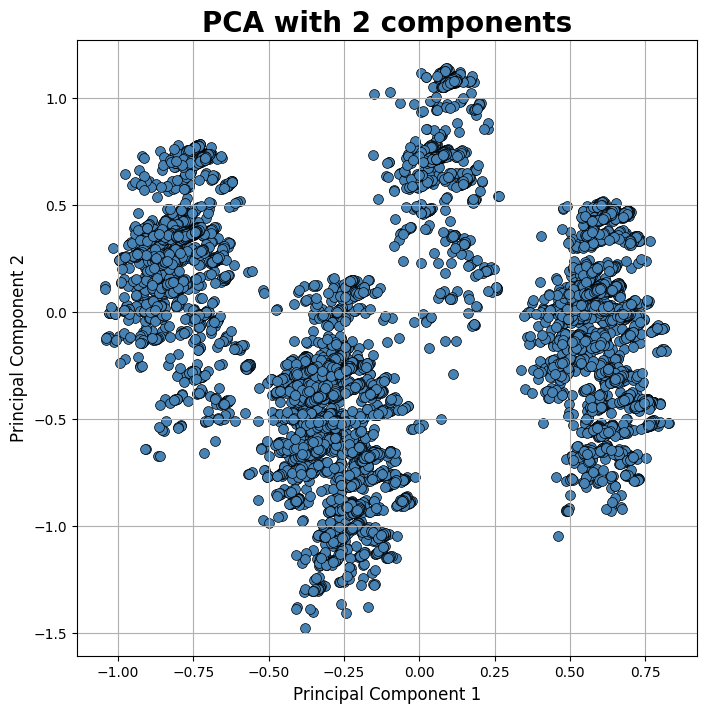

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 12)
ax.set_ylabel('Principal Component 2', fontsize = 12)
ax.set_title('PCA with 2 components', fontsize = 20, fontweight = 'bold')


ax.scatter(df_pca['principal component 1'], df_pca['principal component 2'], 
           color='#4682B4',
           edgecolor='black',
           linewidth=0.5,
           s=50)

ax.grid()
plt.show()

### 2.3 Clustering 
Now that you have prepared the data, you can create the clusters.

1. How can you determine the optimal number of clusters for your data? Please use at least two methods and provide their results.
2. Implement the K-means clustering algorithm (not K-means++) through MapReduce. We request that you develop the algorithm from scratch based on what you've learned in class and run the algorithm on your data.
3. Implement the K-means++ algorithm from scratch and apply it to your data. Do you notice any differences between the results obtained using random initialization and those achieved with K-means++? Please explain your observations and discuss why these differences might occur.
4. Ask an LLM (ChatGPT, Claude AI, Gemini, Perplexity, etc.) to recommend another clustering algorithm. Use that LLM to describe the workings of the algorithm, as well as its advantages and disadvantages compared to K-means and K-means++. Additionally, ask to implement the algorithm for you or utilize an existing version from a package. Apply that algorithm to your data and explain any differences you observe in the results compared to those obtained previously.

# <strong> Installing spark and pyngrok</strong>

In [3]:
df_pca = pd.read_csv("dataset/df_pca.csv")

In [ ]:
!pip install pyngrok , gdown , pyspark , yellowbrick

ERROR: Invalid requirement: ',': Expected package name at the start of dependency specifier
    ,
    ^


In [4]:
from pyngrok import ngrok
ngrok.set_auth_token("2pWpGICA4f0oP0KnQZRtRGKn8Or_8NVfQvpZtT9G7gZYdPsw")
ngrok_tunnel = ngrok.connect(4050)
print("Spark UI is accessible at:", ngrok_tunnel.public_url)

Spark UI is accessible at: https://e474-95-234-231-188.ngrok-free.app


t=2024-12-01T19:18:05+0100 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=0d0c74d59a2e err="read EOF from remote peer"
t=2024-12-01T19:18:05+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=ed3fd091e8b5 clientid=f361c6b85831a7e7d1d1b955d345d3c2


In [5]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from libs.analysis_functions import (
    initialize_spark, load_data, preprocess_movies_ratings,
    calculate_avg_ratings_by_genre, calculate_ratings_by_year,
    inspect_data, save_to_csv
)
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, lit, split, explode, avg, row_number
from pyspark.sql.window import Window
spark = SparkSession.builder.appName("HW4").config("spark.ui.port", "4050").getOrCreate()

In [6]:
sc = spark.sparkContext

In [7]:
sc.stop()

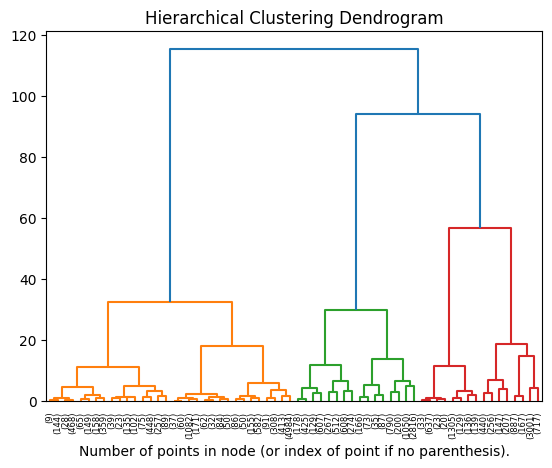

In [29]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

    return linkage_matrix


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_pca)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
linkage_matrix = plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [33]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

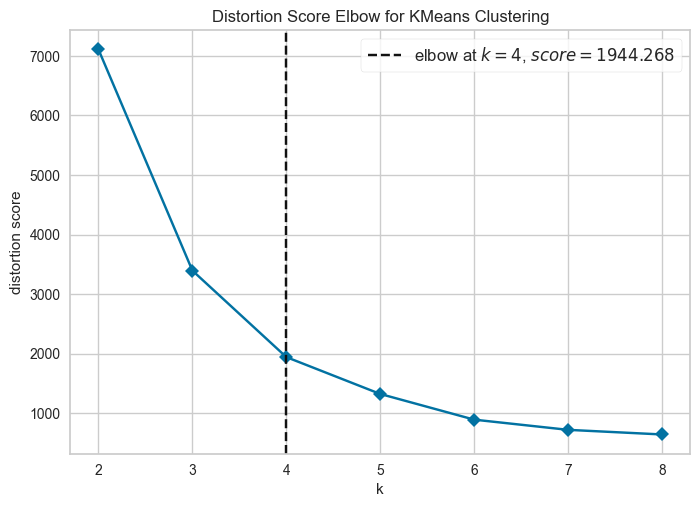

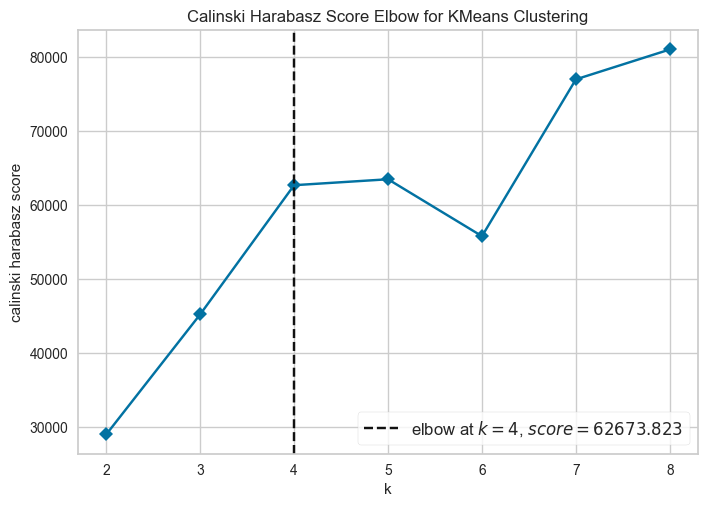

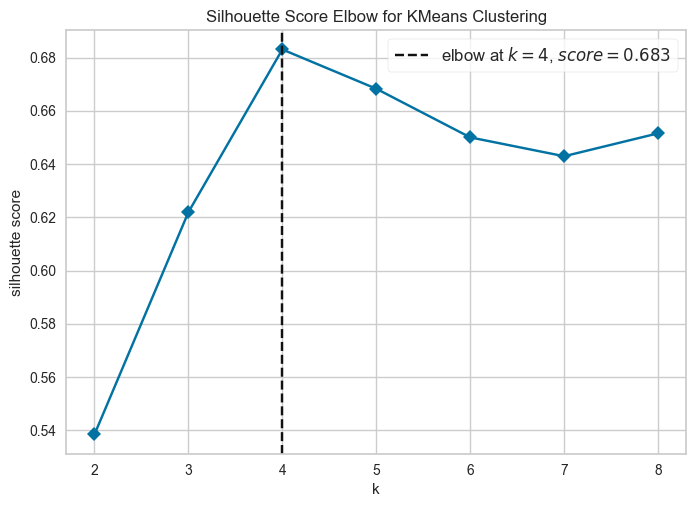

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [34]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9), timings=False)
visualizer.fit(df_pca) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure


visualizer = KElbowVisualizer(
model, k=(2,9), metric='calinski_harabasz', timings=False )
visualizer.fit(df_pca) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figue


visualizer = KElbowVisualizer(
model, k=(2,9), metric='silhouette', timings=False)
visualizer.fit(df_pca) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figue

In [25]:
def k_means(data, k, max_iters=100, tol=1e-6, app_name="KMeans Spark", track_history=False):
    """
    Wrapper function for KMeans class to replicate original usage.

    Args:
        data: Input data as Pandas DataFrame or list of lists.
        k: Number of clusters.
        max_iters: Maximum number of iterations.
        tol: Convergence tolerance.
        app_name: Spark application name.
        track_history: If True, track centroid and label history for visualization.

    Returns:
        centroids: Final centroids.
        clustered_data: Data grouped by clusters.
    """
    model = KmeansSpark(k, max_iters, tol, app_name, track_history)
    return model.fit(data)


In [26]:
k = 4  

centroids, clustered_data = k_means(df_pca, k)


Iteration 1: total shift = 1.2097
Iteration 2: total shift = 0.2902
Iteration 3: total shift = 0.1376
Iteration 4: total shift = 0.0409
Iteration 5: total shift = 0.0355
Iteration 6: total shift = 0.0202
Iteration 7: total shift = 0.0077
Iteration 8: total shift = 0.0028
Iteration 9: total shift = 0.0012
Iteration 10: total shift = 0.0008
Iteration 11: total shift = 0.0001
Iteration 12: total shift = 0.0000
Convergence reached after 12 iterations.


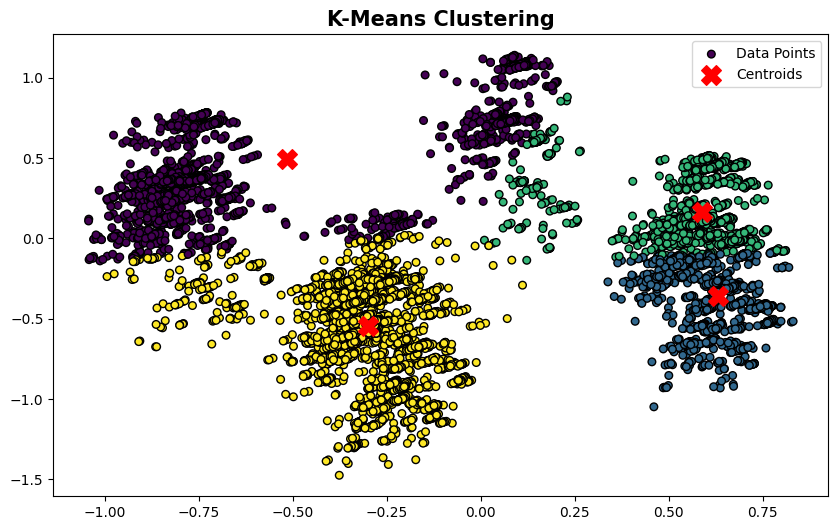

In [27]:
points = np.array([point for _, point in clustered_data])
cluster_labels = np.array([label for label, _ in clustered_data])
centroids = np.array(centroids)


# Plot
plt.figure(figsize=(10, 6))
plt.scatter(points[:, 0], points[:, 1], c=cluster_labels, cmap='viridis', s=30,edgecolor='black', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering", fontsize=15, fontweight='bold')
plt.legend()
plt.show()

In [9]:
def kmeans_plus_plus(data, k, max_iterations=100, tolerance=1e-5):
    """

    Args:
        data: Dataset as a NumPy array.
        k: Number of clusters.
        max_iterations: Maximum number of iterations.
        tolerance: Convergence threshold for centroid shift.

    Returns:
        centroids: Final list of centroids.
        cluster_labels: List of cluster assignments for each point.
    """
    model = KMeansPlusPlus(k, max_iterations, tolerance)
    return model.fit(data)

In [18]:
# Dataset with PCA-transformed values
df_pca_values = df_pca.values  # Convert DataFrame to NumPy array

# Number of clusters
k = 4  

# Run K-Means++
centroids_plus, cluster_labels_plus,labels_history_plus, centroids_history_plus = kmeans_plus_plus(df_pca_values, k)

Iteration 1: Total centroid shift = 0.4477
Iteration 2: Total centroid shift = 0.2684
Iteration 3: Total centroid shift = 0.0922
Iteration 4: Total centroid shift = 0.0200
Iteration 5: Total centroid shift = 0.0155
Iteration 6: Total centroid shift = 0.0180
Iteration 7: Total centroid shift = 0.0121
Iteration 8: Total centroid shift = 0.0018
Iteration 9: Total centroid shift = 0.0008
Iteration 10: Total centroid shift = 0.0004
Iteration 11: Total centroid shift = 0.0001
Iteration 12: Total centroid shift = 0.0000
Convergence reached after 12 iterations.


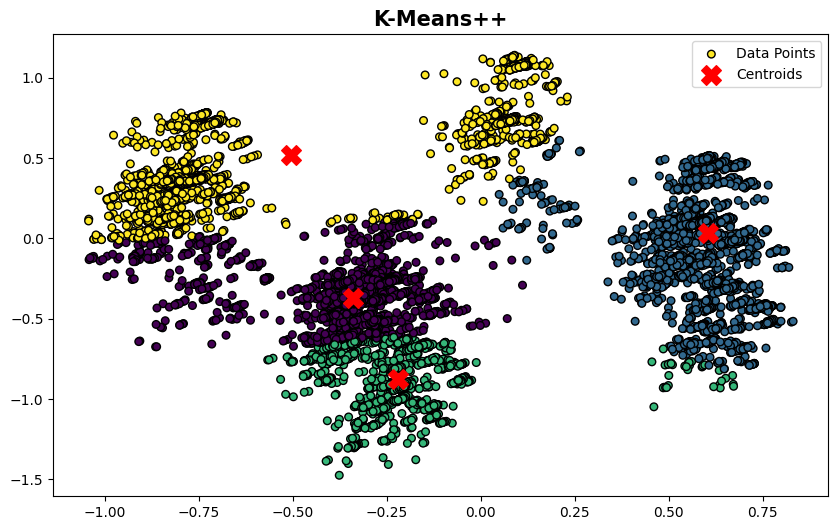

In [24]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(
    df_pca['principal component 1'],
    df_pca['principal component 2'],
    c=cluster_labels_plus,
    cmap='viridis',
    edgecolor='black',
    s=30,
    label='Data Points'
)
plt.scatter(
    centroids_plus[:, 0], centroids_plus[:, 1],
    c='red', s=200, marker='X',
    label='Centroids'
)
plt.title("K-Means++", fontsize=15, fontweight='bold')
plt.legend()
plt.show()

 ### 2.4 Best Algorithm
Clustering helps identify natural groupings within data, but no single algorithm works best for every dataset. In this section, you’ll learn how to choose the most suitable clustering method based on your data’s unique characteristics. By analyzing patterns and comparing results, you’ll uncover which algorithm provides the most meaningful insights and clusters.


1. Set the number of clusters to the optimal number $k_{opt}$ based on any of the methods previously.
2. Select three distinct metrics to assess the quality of the clusters. Describe each metric in detail, including the specific aspects they evaluate to determine the effectiveness of the clustering model.
3. Apply the three clustering algorithms used in the prior section to partition the data into $k_{opt}$ clusters. Then, evaluate each model's clustering quality using the selected metrics. Summarize your findings by comparing the results of each algorithm based on the metric evaluations.

In [36]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

Explained Variance Ratio: [0.18430823 0.14356091]


## 3. Bonus Question
K-means is an iterative algorithm, meaning that with each iteration, it refines the clusters by adjusting them based on the distance of each data point relative to the center of each cluster. This process continues until it reaches a point of convergence or hits a set limit on the number of iterations. You might want to track the progress of forming your clusters.

1. Select two variables* from your instances to display them on a 2D plot. Then, illustrate the progression of the clusters as they change at each iteration. We expect a plot for each iteration, displaying the instances and the clusters they belong to. Select the two features that most effectively separate visual instances belonging to different clusters. Explain the method you used to determine these features.

__*Note:__ Depending on the variables you want to use for clustering, whether they are the original movie features or the components derived from PCA, you may select two features/components that best help to visually display the clusters.

In [10]:
def visualize_kmeans_results(data, centroids_history, labels_history):
    """

    Args:
    - data: Dataset originale (array NumPy, 2D)
    - centroids_history: Lista della storia dei centroidi
    - labels_history: Lista della storia delle etichette dei cluster

    Returns:
    - Figura interattiva Plotly
    """
    if data.shape[1] > 2:
        print("Avviso: il dataset ha più di 2 dimensioni. Uso solo le prime 2.")
        data = data[:, :2]
    
    visualizer = KMeansVisualizer(data, centroids_history, labels_history)
    return visualizer.create_visualization()

In [ ]:
# Crea visualizzazione
fig = visualize_kmeans_results(df_pca_values, centroids_history_plus, labels_history_plus)

# Mostra figura
fig.show()